In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('cars_sampled.csv')

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


As we can see from the data that it contains data about second hand cars. there are few unique keys in the data they are not important and we can remove them

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [5]:
df['postalCode'].nunique()

7018

**Removing The Unique Keys and Unimportant variable**

In [6]:
col_name = ['dateCrawled','name','dateCreated','postalCode','lastSeen']
df = df.drop(col_name, axis=1)

**Taming the null value**

In [7]:
df.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
6,private,offer,400,test,station wagon,1996,manual,0,astra,150000,5,petrol,opel,NaN
13,private,offer,3000,test,NaN,2016,manual,116,3er,150000,0,petrol,bmw,yes
15,private,offer,1600,test,station wagon,1999,manual,140,NaN,150000,3,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,private,offer,0,control,NaN,2017,manual,90,golf,150000,3,NaN,volkswagen,no
49990,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN


In [9]:
df = df.dropna(axis=0)

**Exploratory Data Analysis**

1.Correlation

In [10]:
df.corr()['price'].sort_values()

C:\Users\ticitaca_shubham\AppData\Local\Temp\ipykernel_22796\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


kilometer             -0.052216
monthOfRegistration   -0.001617
yearOfRegistration     0.023915
powerPS                0.031361
price                  1.000000
Name: price, dtype: float64

2.Distribution of num variable

<Figure size 1200x600 with 0 Axes>

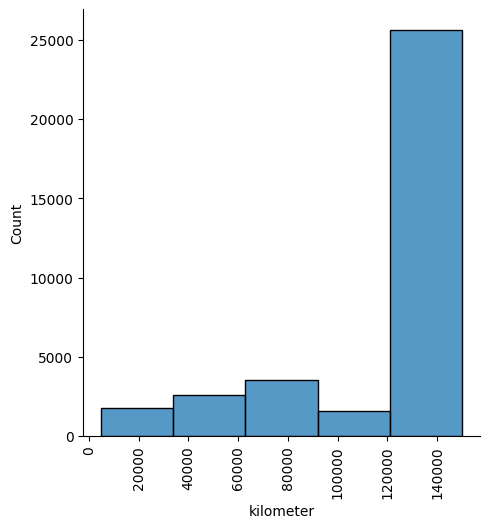

In [11]:
plt.figure(figsize=(12,6))
sns.displot(x='kilometer', data=df, bins=5)
plt.xticks(rotation=90);

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

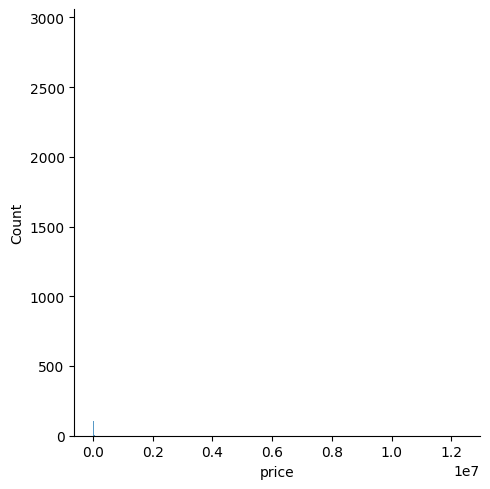

In [13]:
sns.displot(x='price', data=df)

on looking onto the distribution of price variable we can say that there are outliers in the price. so we have to check the outliers and remove them

<AxesSubplot: xlabel='price'>

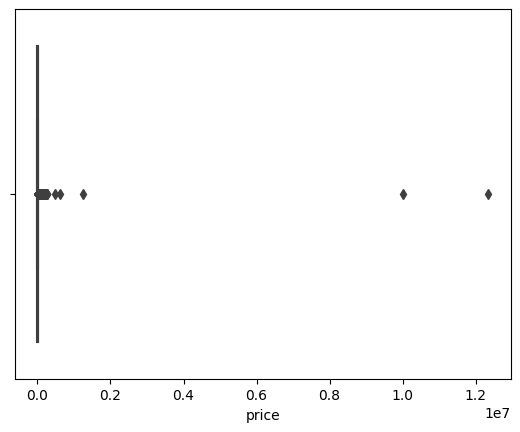

In [14]:
sns.boxplot(x='price', data=df)

In [15]:
df['price'].describe()

count      35107.000
mean        7410.113
std        85615.491
min            0.000
25%         1500.000
50%         3800.000
75%         8500.000
max     12345678.000
Name: price, dtype: float64

In [16]:
np.sum(df['price']>200000)

12

In [17]:
np.sum(df['price']>65000)

97

In [18]:
np.sum(df['price']<10)

499

In [19]:
df = df[(df['price']<65000) & (df['price']>10)]

<AxesSubplot: xlabel='price'>

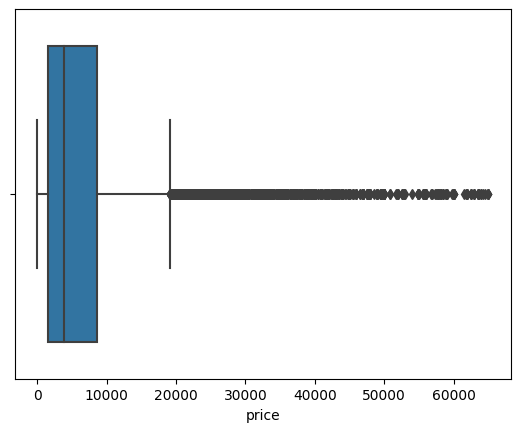

In [20]:
sns.boxplot(x='price', data=df)

Combining the two features 'monthOfRegistration' and 'yearOfRegistration' to get a new feature age.

In [21]:
df['yearOfRegistration'].describe()

count   34507.000
mean     2003.377
std         6.370
min      1929.000
25%      1999.000
50%      2004.000
75%      2008.000
max      2018.000
Name: yearOfRegistration, dtype: float64

Considering the range of features 'yearofRegistration' between 1950 and 2016

In [22]:
df = df[(df['yearOfRegistration']>1950) & (df['yearOfRegistration']<2016)]

In [23]:
df['monthOfRegistration'].describe()

count   34460.000
mean        6.208
std         3.459
min         0.000
25%         3.000
50%         6.000
75%         9.000
max        12.000
Name: monthOfRegistration, dtype: float64

In [24]:
def age_count(year,month):
    age = (2016-year)+month/12
    age = np.round(age,1)
    return age

In [25]:
df['age'] = age_count(df['yearOfRegistration'],df['monthOfRegistration'])

In [26]:
df = df.drop(['yearOfRegistration','monthOfRegistration'], axis=1)

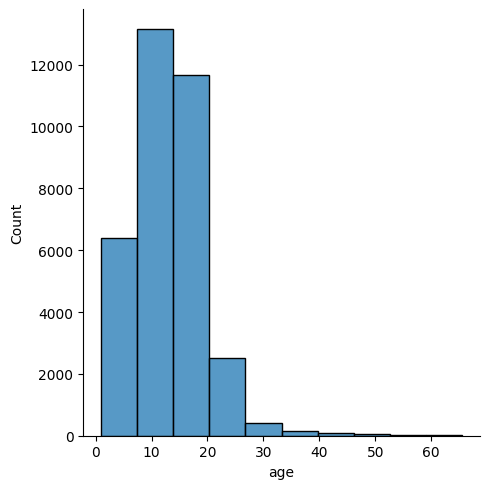

In [27]:
sns.displot(x='age', data=df, bins=10)

<AxesSubplot: xlabel='age', ylabel='Density'>

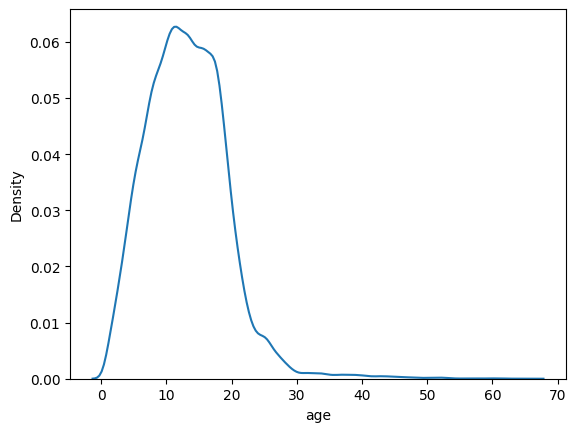

In [28]:
sns.kdeplot(x='age', data=df)

**powerPS**

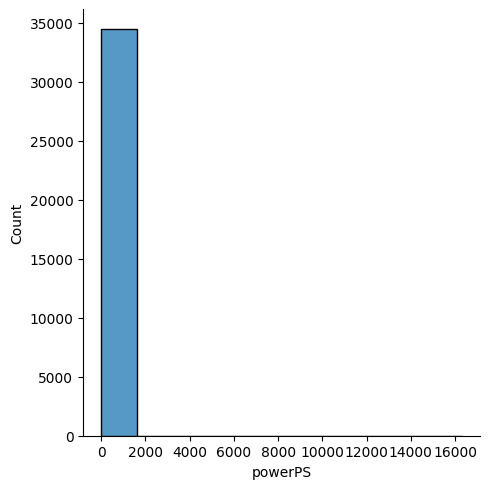

In [29]:
sns.displot(x='powerPS', data=df, bins=10)

<AxesSubplot: xlabel='powerPS'>

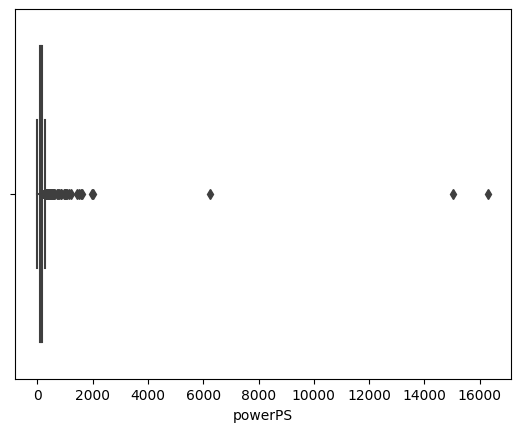

In [30]:
sns.boxplot(x='powerPS', data=df)

In [31]:
df['powerPS'].describe()

count   34460.000
mean      126.137
std       141.637
min         0.000
25%        77.000
50%       116.000
75%       150.000
max     16312.000
Name: powerPS, dtype: float64

In [32]:
np.sum(df['powerPS']>500)

55

In [33]:
np.sum(df['powerPS']<10)

1266

Considering the range of powerPS variable to be in between 10 and 500

In [34]:
df = df[(df['powerPS']>10) & (df['powerPS']<500)]

Now as we have removed outliers from the data lets again check correlation.

In [35]:
df.corr()['price']

C:\Users\ticitaca_shubham\AppData\Local\Temp\ipykernel_22796\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price        1.000
powerPS      0.585
kilometer   -0.476
age         -0.516
Name: price, dtype: float64

### Analysing The categorical variable..

In [36]:
df.describe(include='O').transpose().sort_values('unique').reset_index()

,index,count,unique,top,freq
0,offerType,33132,1,offer,33132
1,seller,33132,2,private,33131
2,abtest,33132,2,test,17146
3,gearbox,33132,2,manual,25371
4,notRepairedDamage,33132,2,no,29824
5,fuelType,33132,7,petrol,21407
6,vehicleType,33132,8,limousine,9894
7,brand,33132,39,volkswagen,6870
8,model,33132,245,golf,2642


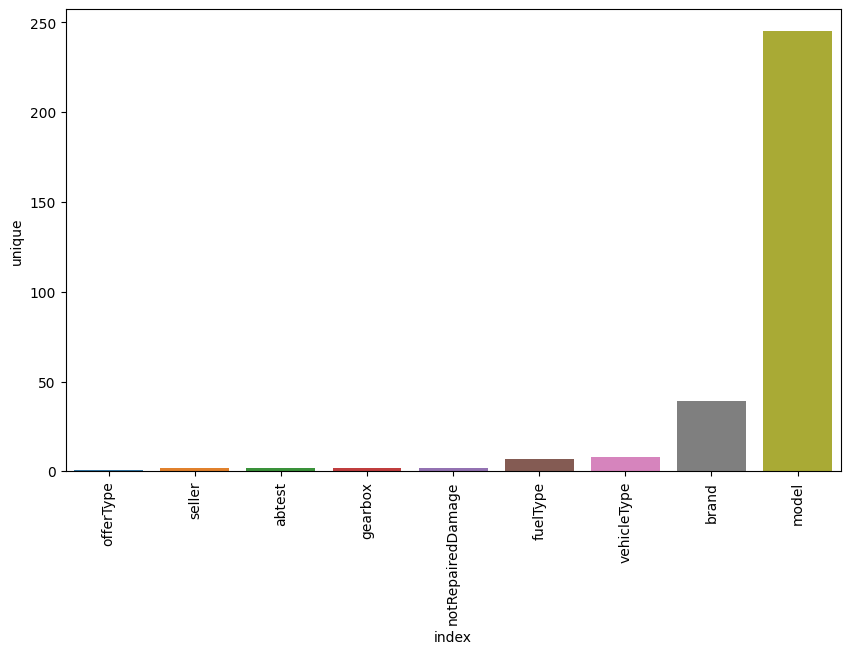

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(y='unique',x='index',data=df.describe(include='O').transpose().sort_values('unique').reset_index())
plt.xticks(rotation=90);

1.seller vs price

<AxesSubplot: xlabel='seller', ylabel='price'>

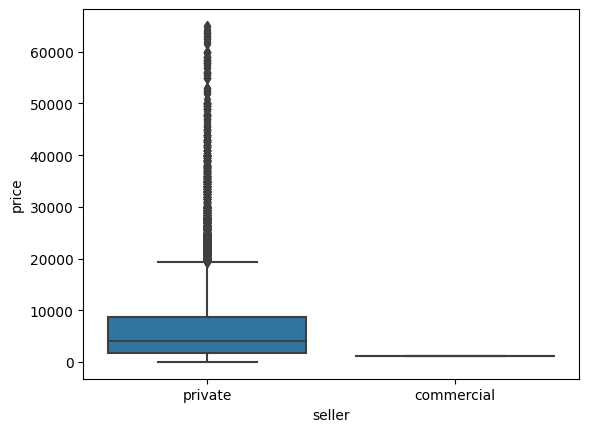

In [38]:
sns.boxplot(x='seller', y='price', data=df)

<AxesSubplot: xlabel='seller', ylabel='count'>

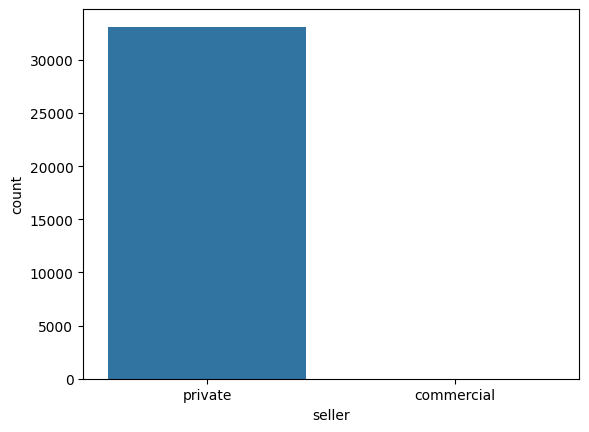

In [39]:
sns.countplot(x='seller', data=df)

In [40]:
df['seller'].value_counts()

private       33131
commercial        1
Name: seller, dtype: int64

2.abtest vs price

<AxesSubplot: xlabel='abtest', ylabel='price'>

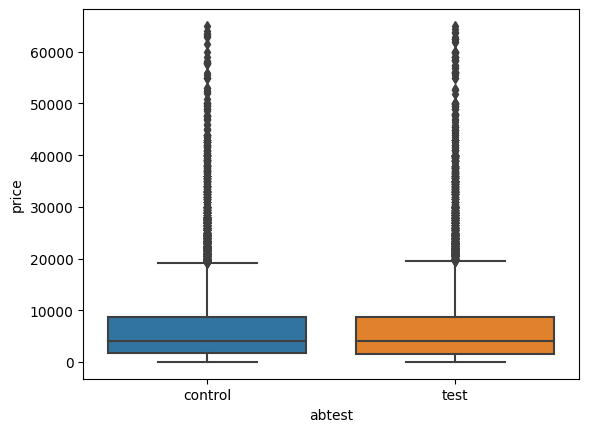

In [41]:
sns.boxplot(x='abtest', y='price', data=df)

<AxesSubplot: xlabel='price', ylabel='Density'>

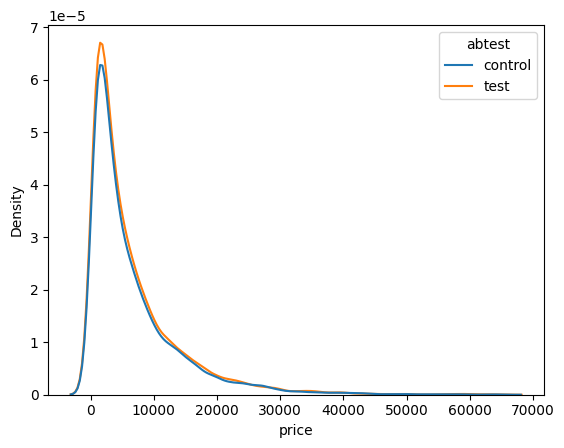

In [42]:
sns.kdeplot(x='price', data=df, hue='abtest')

<AxesSubplot: xlabel='abtest', ylabel='count'>

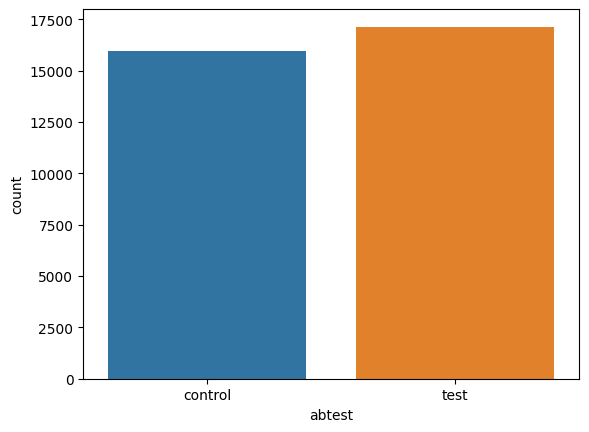

In [43]:
sns.countplot(x='abtest', data=df)

3.gearbox vs price

<AxesSubplot: xlabel='gearbox', ylabel='price'>

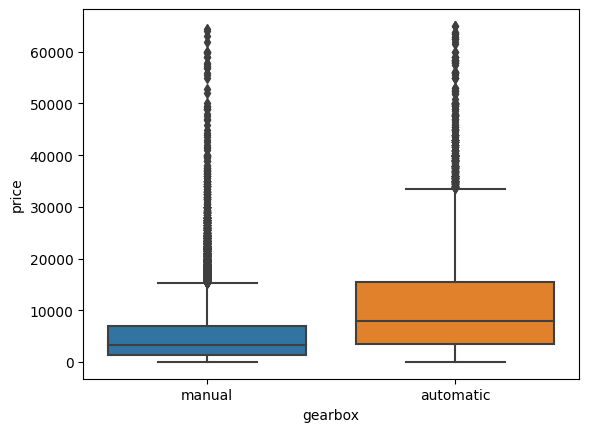

In [44]:
sns.boxplot(x='gearbox', y='price', data=df)

<AxesSubplot: xlabel='price', ylabel='Density'>

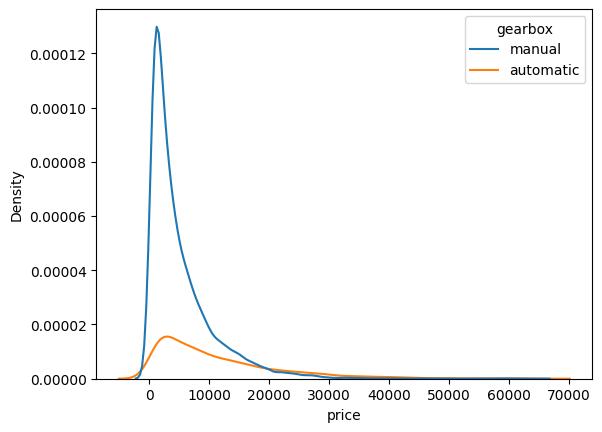

In [45]:
sns.kdeplot(x='price', data=df, hue='gearbox')

<AxesSubplot: xlabel='gearbox', ylabel='count'>

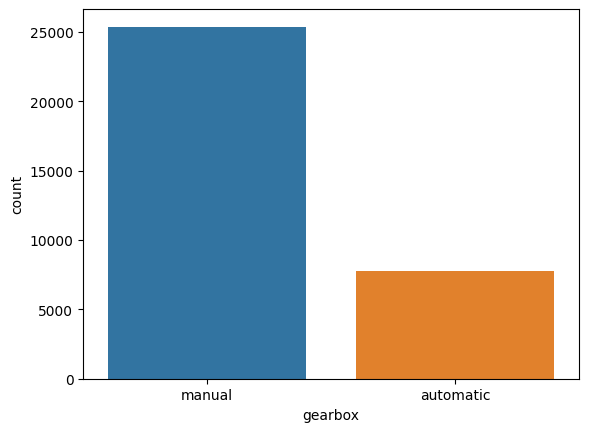

In [46]:
sns.countplot(x='gearbox', data=df)

4.notRepairedDamage vs price

<AxesSubplot: xlabel='notRepairedDamage', ylabel='price'>

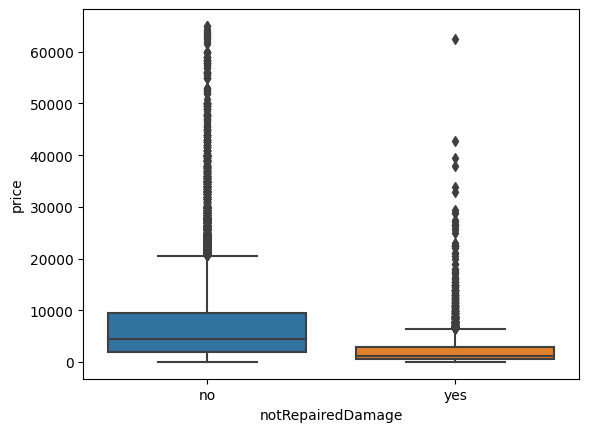

In [47]:
sns.boxplot(x='notRepairedDamage', y='price', data=df)

<AxesSubplot: xlabel='notRepairedDamage', ylabel='count'>

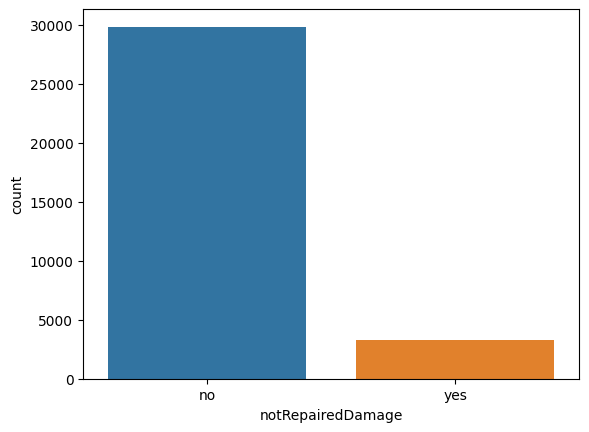

In [48]:
sns.countplot(x='notRepairedDamage', data=df)

5.fuelType vs price

<AxesSubplot: xlabel='fuelType', ylabel='price'>

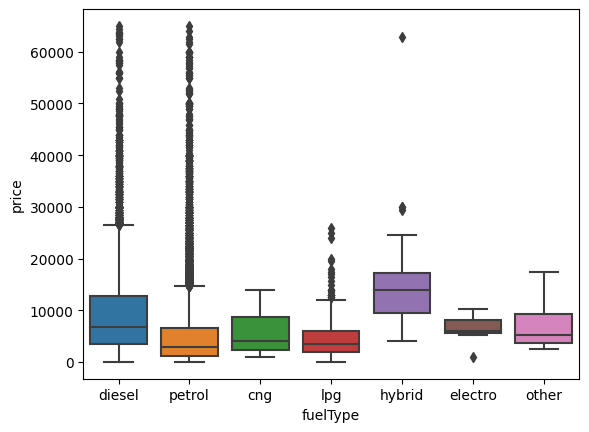

In [49]:
sns.boxplot(x='fuelType', y='price', data=df)

<AxesSubplot: xlabel='fuelType', ylabel='count'>

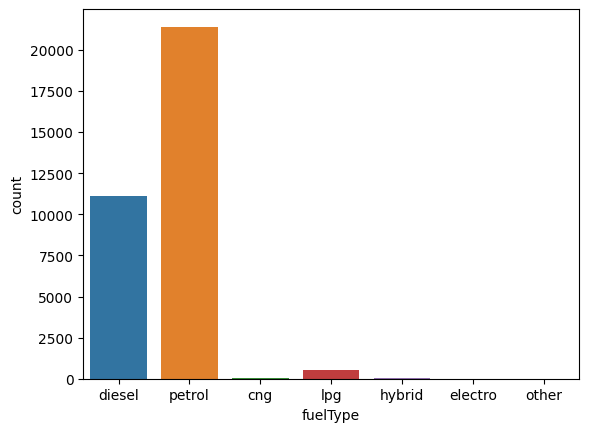

In [50]:
sns.countplot(x='fuelType', data=df)

In [51]:
df['fuelType'].value_counts()

petrol     21407
diesel     11098
lpg          524
cng           61
hybrid        31
electro        7
other          4
Name: fuelType, dtype: int64

6.vehicleType vs price

<AxesSubplot: xlabel='vehicleType', ylabel='price'>

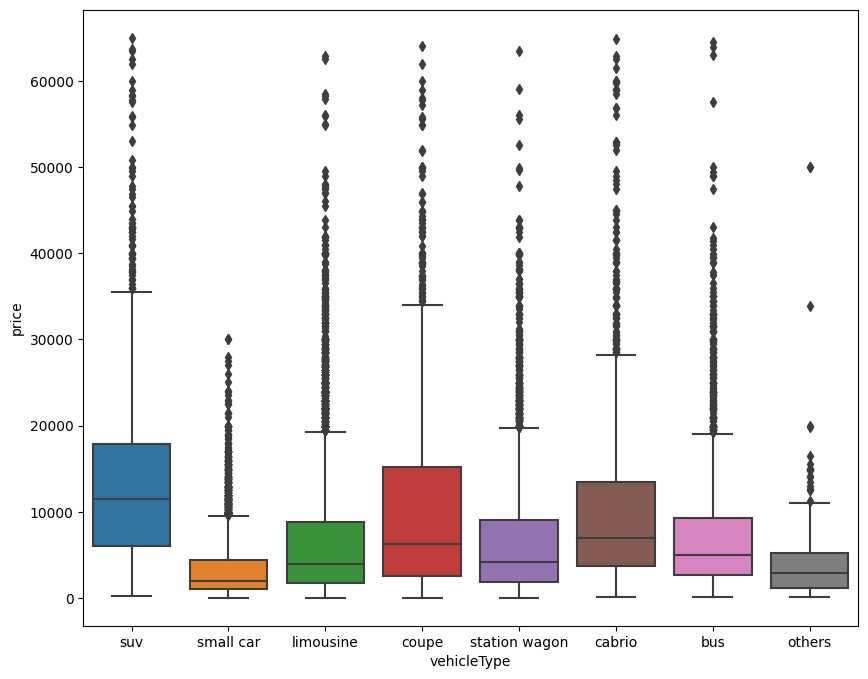

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(x='vehicleType', y='price', data=df)

In [53]:
df['vehicleType'].value_counts().sort_values()

others            201
suv              1547
coupe            1827
cabrio           2319
bus              3137
station wagon    6774
small car        7433
limousine        9894
Name: vehicleType, dtype: int64

**brand and model**

In [54]:
df['brand'].value_counts().sort_values(ascending=False)[:5]

volkswagen       6870
bmw              3941
mercedes_benz    3435
opel             3271
audi             3241
Name: brand, dtype: int64

In [55]:
df['model'].value_counts().sort_values(ascending=False)[:5]

golf      2642
others    2400
3er       2025
polo      1114
corsa     1036
Name: model, dtype: int64

From our exploratory data analysis we got that ['seller','abtest','offerType'] are not affecting the price variable. We will go ahead and drop those variables.

In [56]:
df = df.drop(['seller','abtest','offerType'], axis=1)

**Fitting a linear regression model to the cleaned data**

### DataPreparation.

In [57]:
X = df.drop('price', axis=1)
y = df['price']

In [58]:
X = pd.get_dummies(X, drop_first=True)

In [59]:
y = np.log(y)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### LinearRegression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression(fit_intercept=True)

In [64]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
y_pred

array([7.88294895, 9.89913836, 7.48646375, ..., 8.17777747, 7.35983101,
       7.92097708])

### ModelEvaluation And Residual Analysis

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [68]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [69]:
print('Mean Absolute Error:', MAE)
print('Mean Sqaured Error:', MSE)
print('Root Mean Squared Error:', RMSE)

Mean Absolute Error: 0.37021936069523753
Mean Sqaured Error: 0.29129408931029815
Root Mean Squared Error: 0.5397166750345019


In [70]:
residuals = y_test-y_pred

<AxesSubplot: xlabel='price', ylabel='price'>

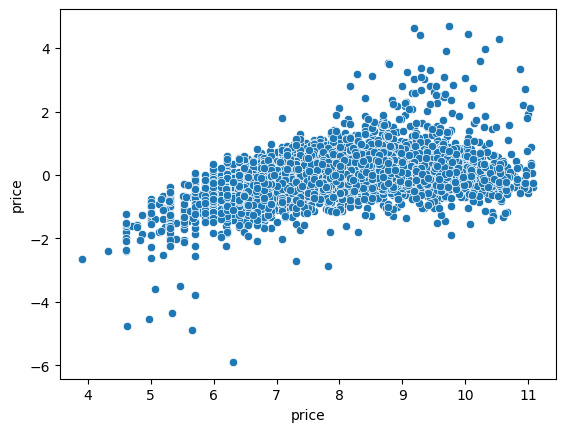

In [71]:
sns.scatterplot(x=y_test,y=residuals)

In [72]:
residuals.describe()

count   9940.000
mean       0.004
std        0.540
min       -5.895
25%       -0.252
50%        0.033
75%        0.284
max        4.698
Name: price, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Density'>

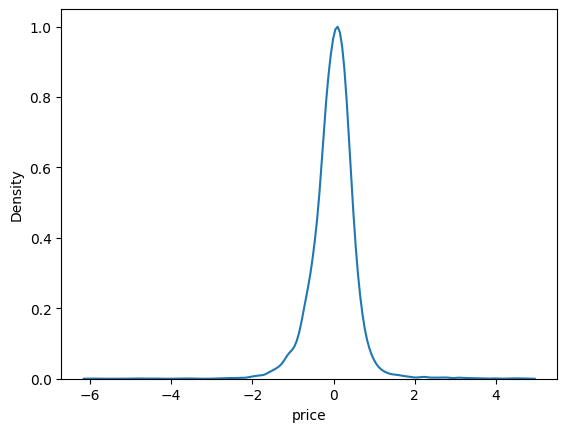

In [73]:
sns.kdeplot(x=residuals)

### Scaling the data

**On fitting the sacled dataframe on the linear model the predictions were contradictory and we were getting vey high mean absolute error and mean squared error**

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rfr = RandomForestRegressor(n_estimators=100, max_features='auto')

In [76]:
rfr.fit(X_train, y_train)

C:\Users\ticitaca_shubham\Envs\roar\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto')

In [77]:
y_pred = rfr.predict(X_test)

In [78]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [79]:
print('Mean Absolute Error:', MAE)
print('Mean Sqaured Error:', MSE)
print('Root Mean Squared Error:', RMSE)

Mean Absolute Error: 0.2968437660997382
Mean Sqaured Error: 0.19388426464104958
Root Mean Squared Error: 0.44032290951192804


In [80]:
residuals = y_test-y_pred

<AxesSubplot: xlabel='price', ylabel='price'>

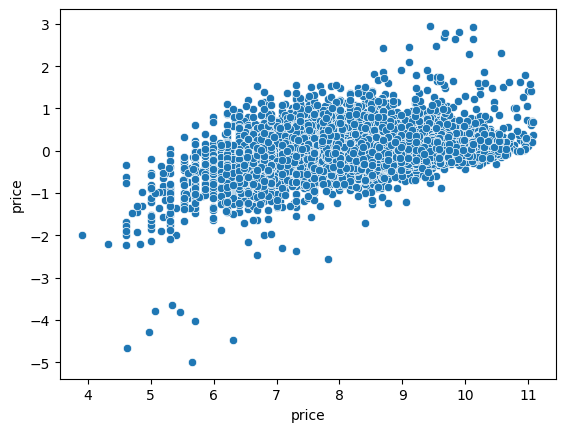

In [81]:
sns.scatterplot(x=y_test,y=residuals)